<a href="https://colab.research.google.com/github/AkulaTejdeep/DAUP37/blob/main/2203A52133_DAUP_LAB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import IsolationForest


In [18]:
data_url = "/content/dermatology_database_1.csv"
data = pd.read_csv(data_url)

In [19]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                   

In [20]:
data.replace('?', np.nan, inplace=True)

data = data.apply(pd.to_numeric, errors='coerce')

data.fillna(data.median(), inplace=True)



In [21]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
print("\nTraining SVM and Random Forest before handling outliers")



Training SVM and Random Forest before handling outliers


In [24]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

SVM Accuracy: 0.7297297297297297
SVM Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.97      0.95        31
           2       0.35      1.00      0.51         9
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00        10
           6       0.67      0.67      0.67         3

    accuracy                           0.73        74
   macro avg       0.49      0.61      0.52        74
weighted avg       0.64      0.73      0.66        74



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9864864864864865
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



In [26]:
print("\nHandling Outliers")
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_pred = iso_forest.fit_predict(X)
outliers = outlier_pred == -1


Handling Outliers


In [27]:
X_no_outliers = X[~outliers]
y_no_outliers = y[~outliers]

In [28]:
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42)

In [29]:
svm_model_no_outliers = SVC()
svm_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
svm_pred_no_outliers = svm_model_no_outliers.predict(X_test_no_outliers)
svm_accuracy_no_outliers = accuracy_score(y_test_no_outliers, svm_pred_no_outliers)
print("SVM Accuracy after Removing Outliers:", svm_accuracy_no_outliers)
print("SVM Classification Report after Removing Outliers:\n", classification_report(y_test_no_outliers, svm_pred_no_outliers))

SVM Accuracy after Removing Outliers: 0.6363636363636364
SVM Classification Report after Removing Outliers:
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        20
           2       0.25      1.00      0.40         7
           3       1.00      1.00      1.00        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        12
           6       0.50      0.67      0.57         3

    accuracy                           0.64        66
   macro avg       0.45      0.61      0.49        66
weighted avg       0.53      0.64      0.56        66



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
rf_model_no_outliers = RandomForestClassifier(random_state=42)
rf_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)
rf_pred_no_outliers = rf_model_no_outliers.predict(X_test_no_outliers)
rf_accuracy_no_outliers = accuracy_score(y_test_no_outliers, rf_pred_no_outliers)
print("Random Forest Accuracy after Removing Outliers:", rf_accuracy_no_outliers)
print("Random Forest Classification Report after Removing Outliers:\n", classification_report(y_test_no_outliers, rf_pred_no_outliers))

Random Forest Accuracy after Removing Outliers: 0.9848484848484849
Random Forest Classification Report after Removing Outliers:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00        13
           4       0.92      1.00      0.96        11
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         3

    accuracy                           0.98        66
   macro avg       0.99      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66




Plotting Histograms for Each Column


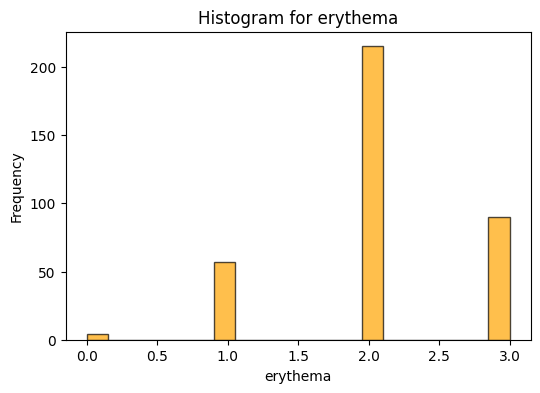

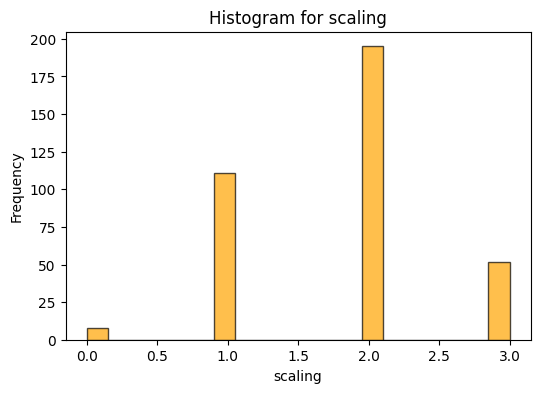

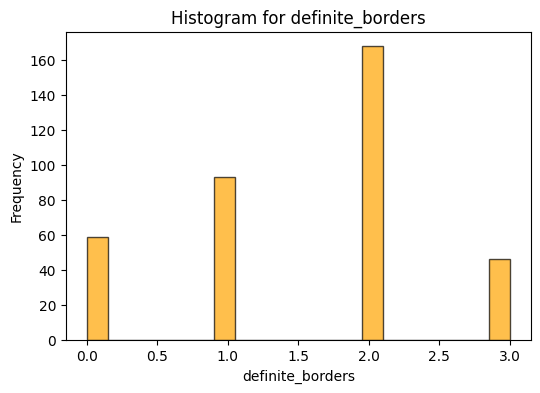

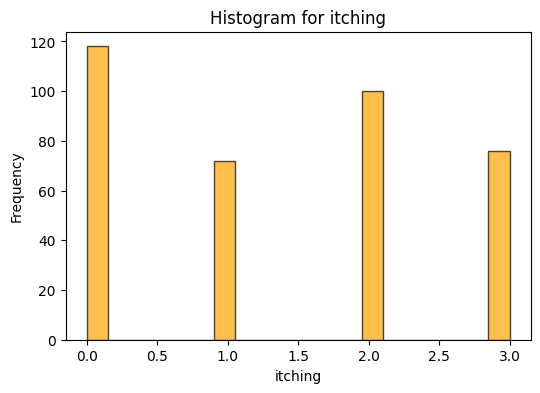

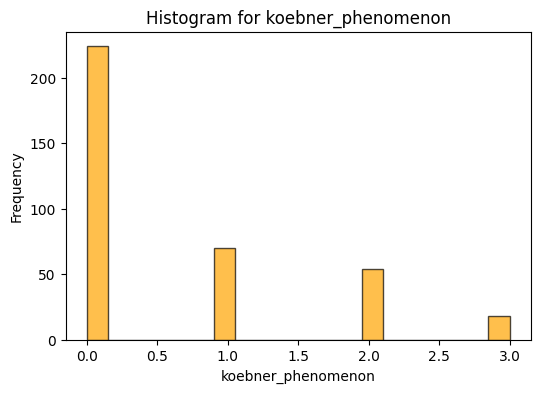

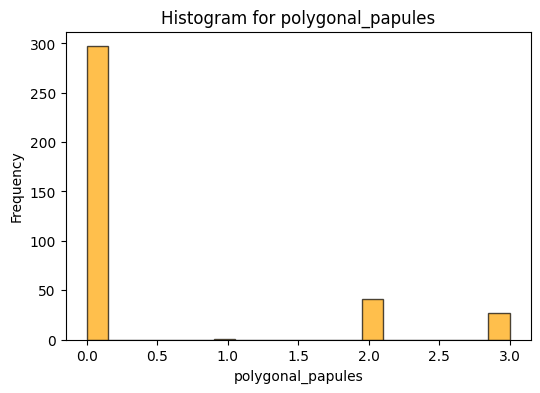

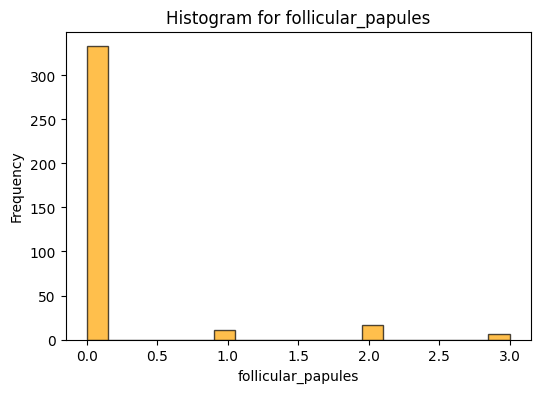

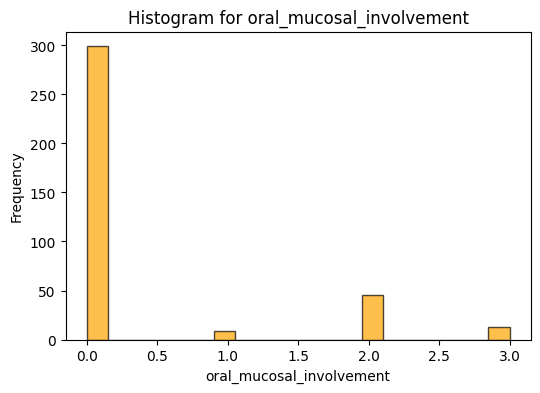

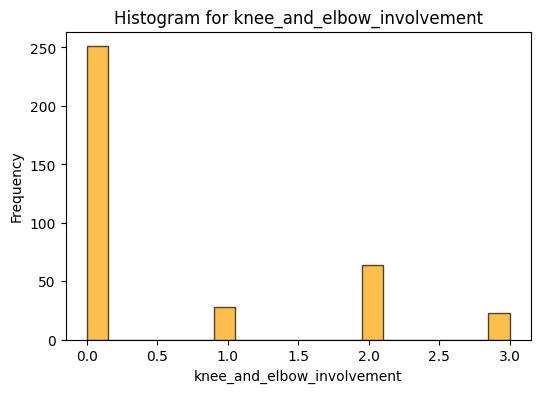

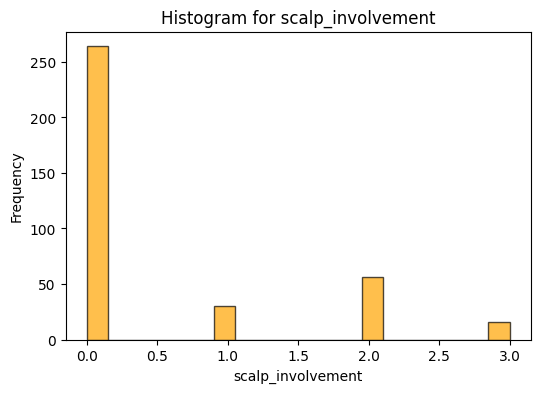

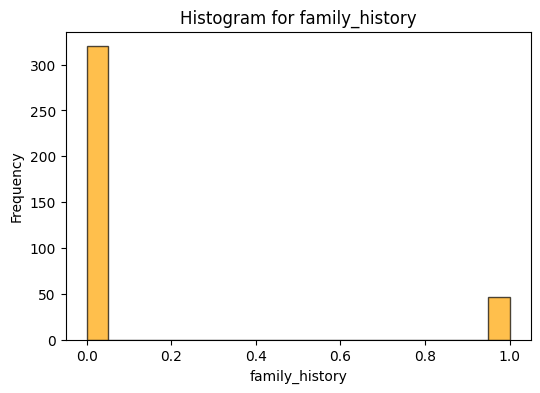

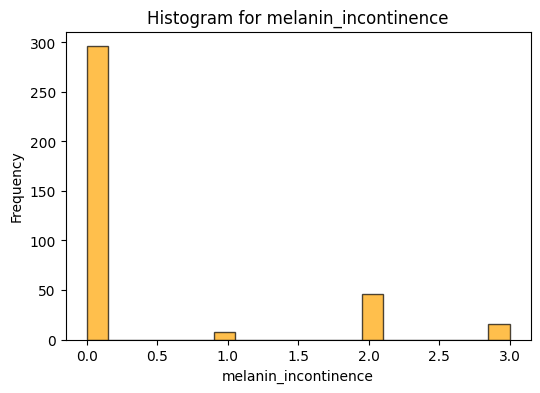

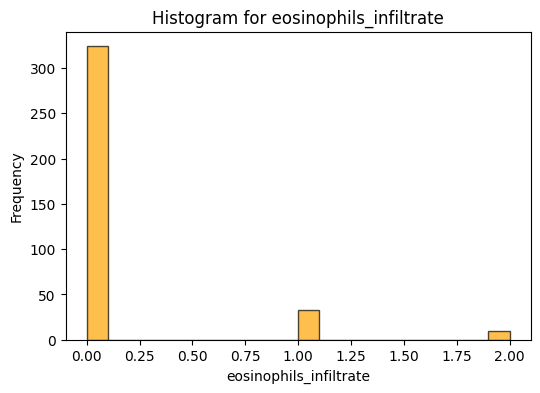

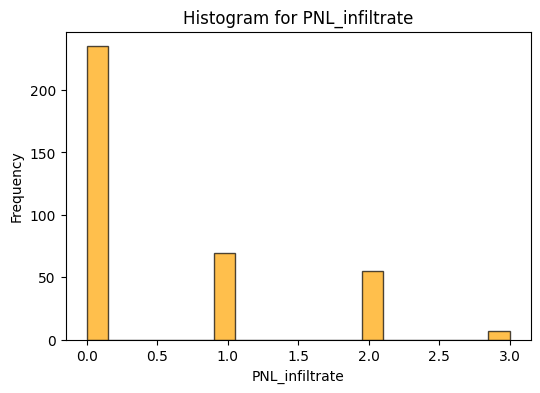

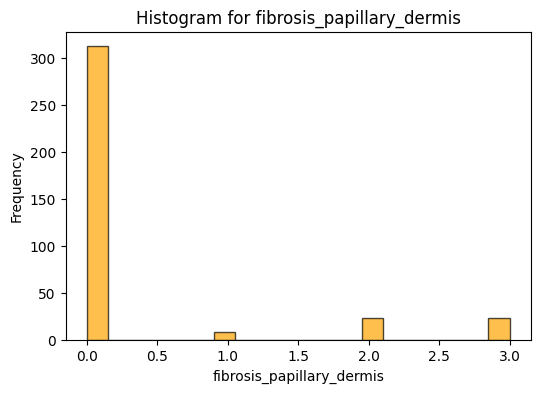

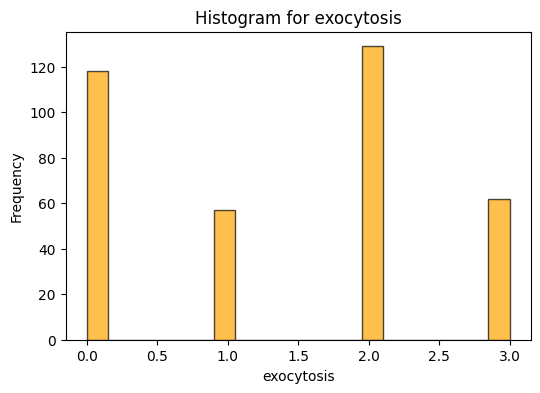

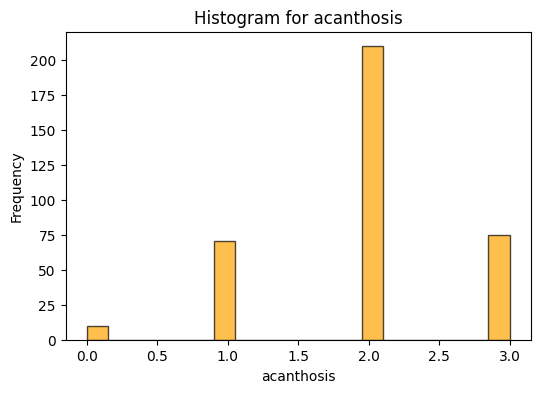

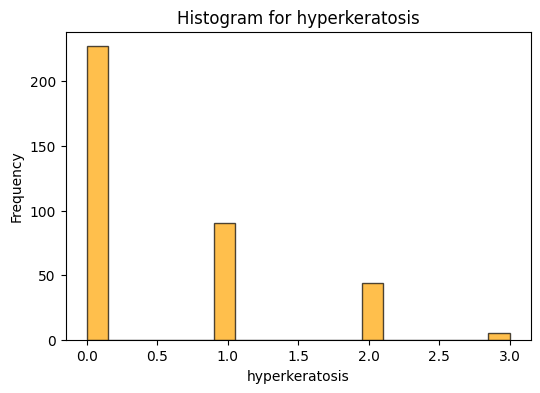

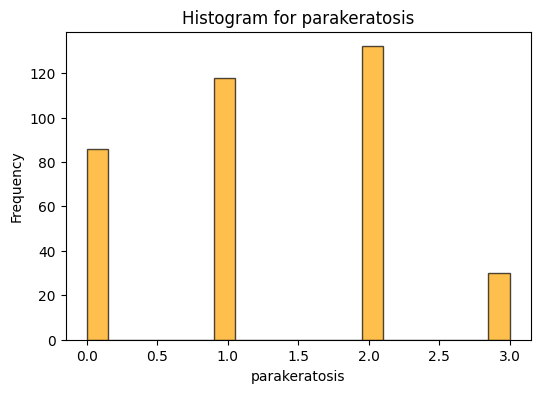

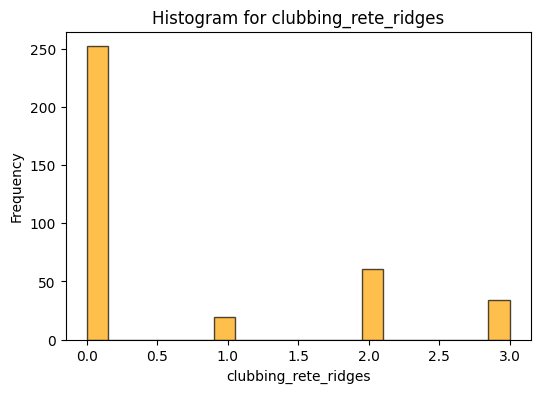

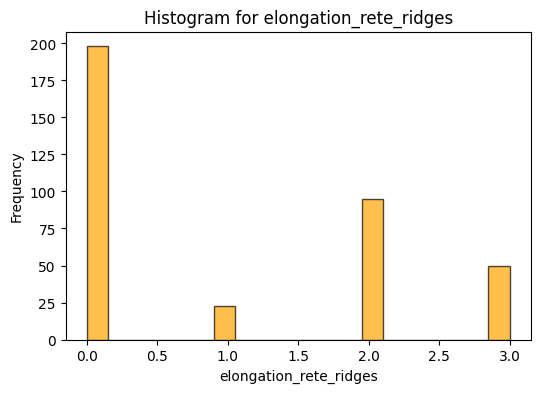

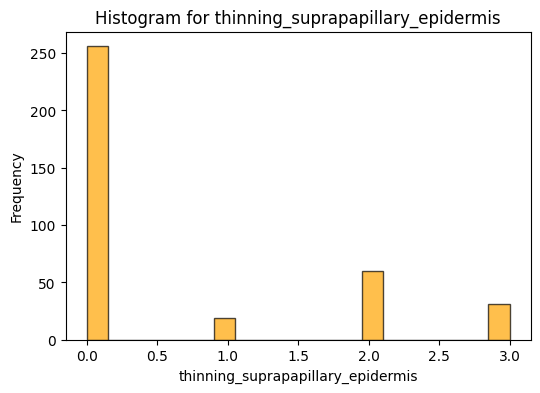

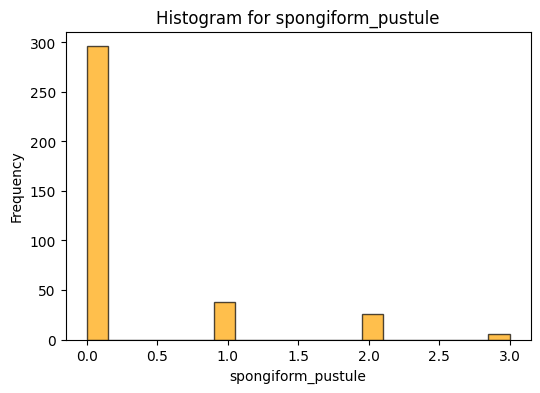

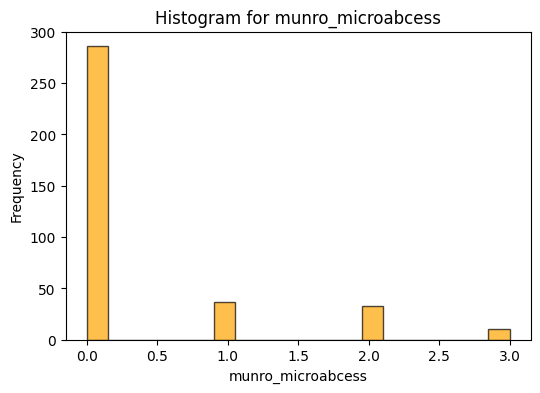

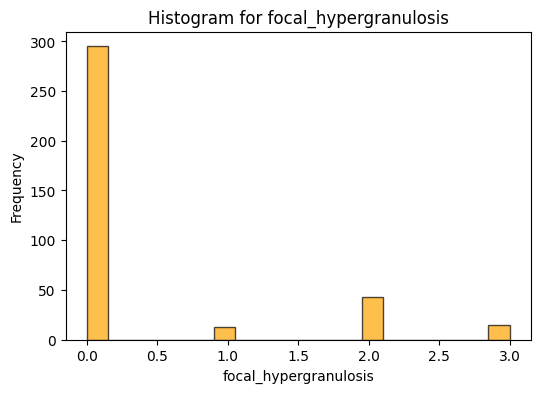

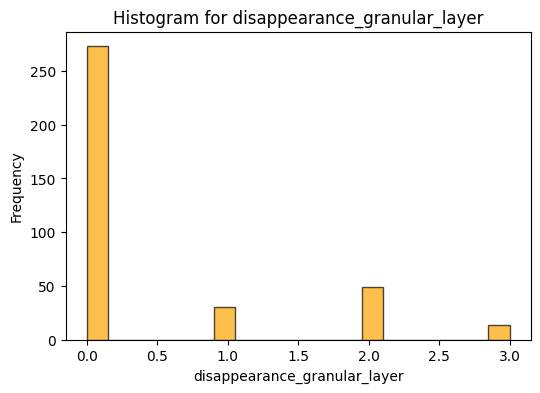

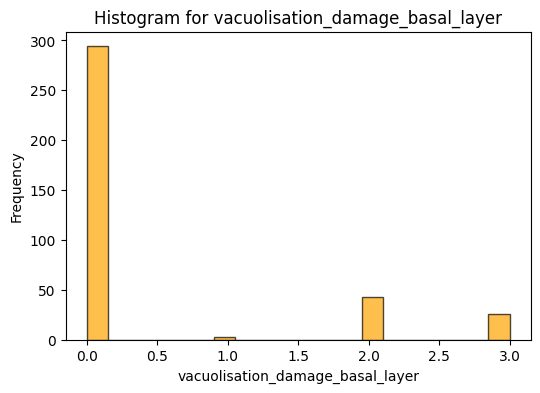

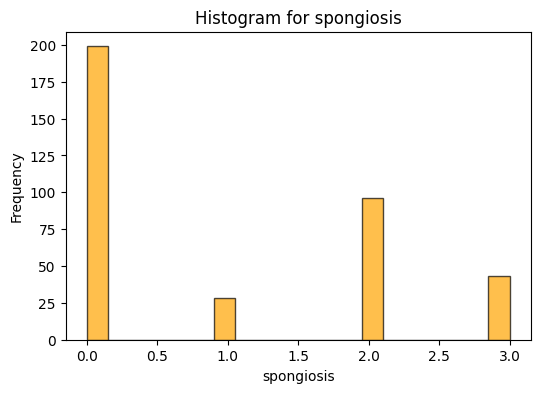

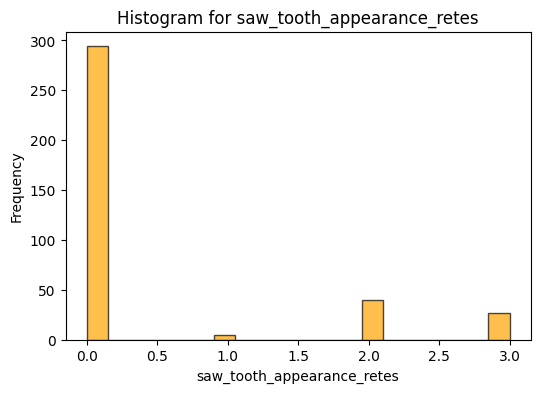

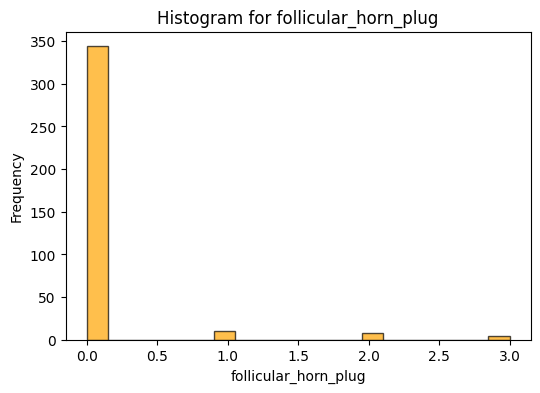

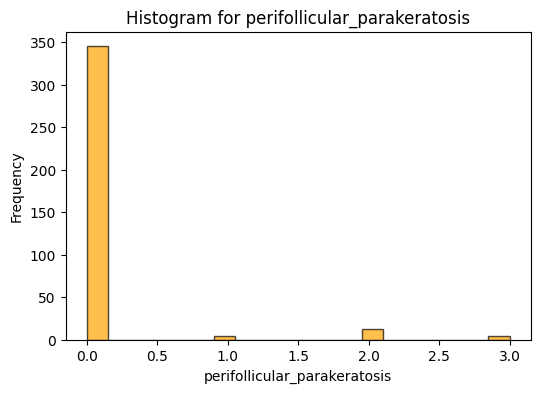

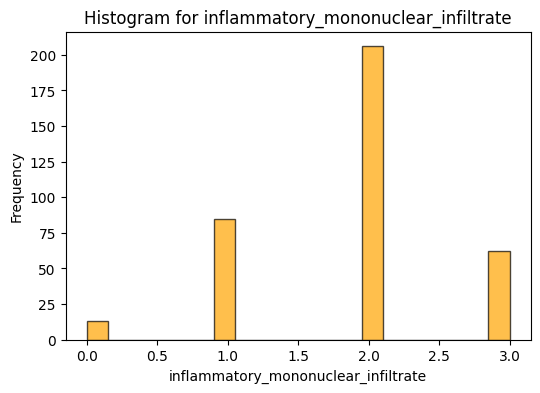

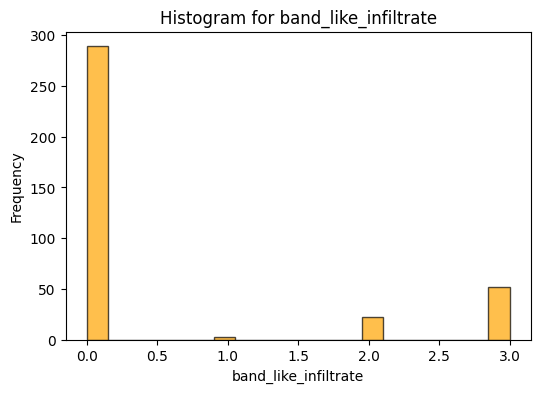

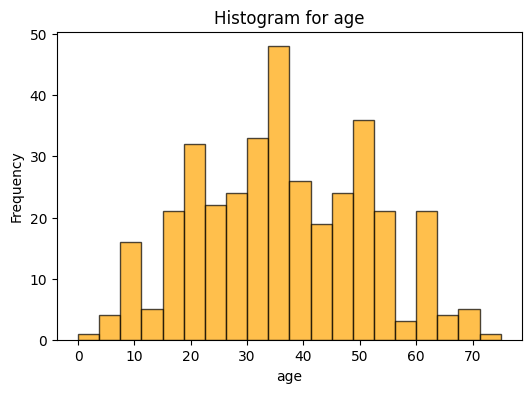

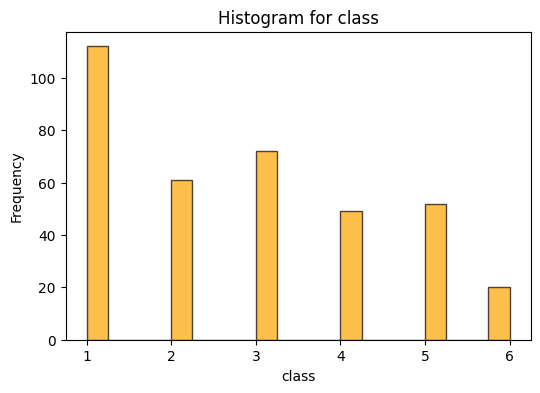

In [32]:
print("\nPlotting Histograms for Each Column")
columns = data.columns
for col in columns:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=20, alpha=0.7, color='orange', edgecolor='black')
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()